In [140]:
import math

import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import math
import json

base_dir = "/home/ozgunbabur/Data/Josh/"

In [17]:
# norm_mat = pd.read_table("/home/meric/Desktop/normalized_mat_v2.tsv",index_col=1)
norm_mat = pd.read_table(base_dir + "normalized_denoised_mat.tsv", index_col=0)

In [1]:
norm_mat = norm_mat.iloc[:, 1:]

NameError: name 'norm_mat' is not defined

In [6]:
norm_mat.head()

,midpoint_AAACCTGCACCCAGTG-1,midpoint_AAACCTGCAGCTTAAC-1,midpoint_AAACCTGGTGTGCGTC-1,midpoint_AAACCTGGTTGAACTC-1,midpoint_AAACGGGAGGATGGTC-1,midpoint_AAACGGGAGGGCTCTC-1,midpoint_AAACGGGAGTAACCCT-1,midpoint_AAACGGGCATGGGACA-1,midpoint_AAACGGGGTCTGCAAT-1,midpoint_AAACGGGTCAATCTCT-1,...,tumor_TTTATGCCAAGCCTAT-1,tumor_TTTATGCGTGCAGTAG-1,tumor_TTTATGCTCGCCTGAG-1,tumor_TTTCCTCCAAGTTCTG-1,tumor_TTTCCTCCACCAGTTA-1,tumor_TTTCCTCGTATGCTTG-1,tumor_TTTGCGCCACGGTTTA-1,tumor_TTTGGTTCAGCCTGTG-1,tumor_TTTGGTTCAGTGAGTG-1,tumor_TTTGGTTGTGCAACTT-1
Xkr4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sox17,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mrpl15,0.0,0.0,0.000000,0.0,0.000000,0.0,1.003354,0.0,0.00000,0.000000,...,0.467282,0.908944,0.0,1.121759,0.355743,0.244490,0.379996,0.485346,0.984984,0.361297
Lypla1,0.0,0.0,0.777323,0.0,1.202458,0.0,0.000000,0.0,0.00000,0.000000,...,0.181113,0.687029,0.0,0.296425,0.000000,0.440794,0.379996,0.485346,0.696472,0.361297
Tcea1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.09107,1.058914,...,0.334399,0.401390,0.0,0.296425,0.355743,0.244490,0.768113,0.271833,0.289346,0.196877


In [10]:
# coords = pd.read_table("/home/meric/Desktop/umap_coords.tsv",index_col=0)
coords = pd.read_table(base_dir + "umap_coords.tsv", index_col=0)

In [7]:
luminal_progenitor = ["Elf5", "Cd14", "Kit", "Aldh1a1", "Aldh1a3", "Foxc1", "Foxc2", "Itga2", "Itgb3", "Tspan8", "Cd55",
                      "Fabp7"]
mature_luminal = ["Krt7", "Krt8", "Krt18", "Krt19", "Epcam", "Prlr", "Areg", "Sox9", "Prom1", "Ly6a", "Csn3", "Muc1",
                  "Trf", "Cd24a", "Gata3", "Alcam", "Ar", "Cd200", "Cdh1", "Ceacam1", "Cited1", "Csn2", "Cxcl15",
                  "Egfr", "Egr1", "Ehf", "Elf1", "Elf2", "Elf3", "Elf4", "Erbb2", "Erbb3", "Erbb4", "Esr1", "Foxa1",
                  "Foxa2", "Glycam1", "Hes1", "Hey1", "Jag1", "Jag2", "Krt4", "Lalba", "Notch1", "Notch2", "Notch3",
                  "Notch4", "Nrg4", "Numb", "Pgr", "S100a6", "Sox10", "Sox11", "Sox12", "Sox13", "Sox14", "Sox15",
                  "Sox17", "Sox18", "Sox4", "Sox5", "Sox6", "Sox7", "Sox8", "Stc1", "Stc2", "Wap", "Wfdc18", "Wnt4",
                  "Wnt5a", "Ltf", "Itga2", "Itgb3", "Cldn1", "Cldn4", "Cldn6", "Cldn10", "Cldn12", "Pdpn"]
hormone_sensing_luminal = ["Prlr", "Pgr", "Esr1", "Ly6a", "Prom1", "Cited1"]
alveol_luminal = ["Csn3", "Ltf", "Mfge8", "Muc1", "Lalba", "Trf", "Wfdc18"]
myoepithelial = ["Moxd1", "Ncam1", "Nes", "Ngfr", "Nrg1", "Nt5e", "Oxtr", "Pard3b", "Pdpn", "Procr", "Pygo2", "Sfrp1",
                 "Snai1", "Snai2", "Snai3", "Taz", "Tgfbr1", "Tgfbr2", "Tgfbr3", "Trp53", "Trp63", "Twist1", "Twist2",
                 "Wif1", "Wnt10a", "Wnt11", "Wnt6", "Zeb1", "Zeb2", "Krt5", "Krt14", "Krt17", "Cd44", "Vim", "Acta2",
                 "Sparc", "Myh11", "Myl9", "Mylk", "Cdh2", "Cdh3", "Mmp3", "Mmp9", "Igfbp4", "Fn1", "Col1a1", "Col1a2",
                 "Col3a1", "Serpine1", "Mme", "Axin2", "Itga6", "Itgav", "Lgr5", "Lgr6", "Lrp5", "Lrp6", "Icam1",
                 "Cd47", "Id4", "Fzd7", "Runx2", "Cav1", "Msn", "Gng11", "Dkk3", "Bmp7", "Lgals1", "Thy1", "Inpp5d",
                 "Trp73"]

In [138]:
def get_top_k_cells(norm_mat, marker_list, cell_prefix, top_k):
    marker_exp = norm_mat[norm_mat.index.isin(marker_list)]
    marker_exp_sum = marker_exp.sum(axis=0)
    sorted_list = marker_exp_sum.sort_values(ascending=False)
    sorted_list = sorted_list[sorted_list.index.isin([c for c in sorted_list.index.to_list() if c.startswith(cell_prefix)])]
    return sorted_list[0:top_k].index.to_list()

def write_top_k_cells(norm_mat, marker_list, cell_prefix, top_k, output_path):
    selected_cells = get_top_k_cells(norm_mat, marker_list, cell_prefix, top_k)
    with open(output_path, "w") as fp:
        json.dump(selected_cells, fp)

# plot marker gets normalized count matrix, umap coordinates and cell marker list as input
def plot_cells(selected_cells, umap_coords):
    sub_cell = umap_coords[umap_coords.index.isin(selected_cells)]
    plt.figure(figsize=(10, 10))
    ax = plt.axes()
    ax.scatter(umap_coords['UMAP_1'], umap_coords['UMAP_2'])
    # scatter warning points in red (c='r')
    ax.plot(sub_cell['UMAP_1'], sub_cell['UMAP_2'], 'o', c='r')
    plt.show()

def plot_marker(norm_mat, umap_coords, marker_list, cell_prefix, top_k):
    selected_cells = get_top_k_cells(norm_mat, marker_list, cell_prefix, top_k)
    plot_cells(selected_cells, umap_coords)


def write_diffexp_for_two_selections(norm_mat, selection_test, selection_control, out_path):
    signed_p = []
    genes = norm_mat.index.values.tolist()

    for i in range(len(genes)):
        # gene = genes[i]
        vals_test = norm_mat[selection_test].iloc[i].to_numpy()
        vals_control = norm_mat[selection_control].iloc[i].to_numpy()

        tt = stats.ttest_ind(vals_test, vals_control)
        sp = tt[1]
        if tt[0] < 0:
            sp = -sp
        signed_p.append(sp)

    result = pd.DataFrame(signed_p, columns=["SignedP"], index=genes)
    result.to_csv(out_path, sep="\t")

In [132]:
select_lum_proj = get_top_k_cells(norm_mat, luminal_progenitor, "m", 500)
select_myo = get_top_k_cells(norm_mat, myoepithelial, "m", 500)
select_tumor = get_top_k_cells(norm_mat, [], "t", 10000)
print(len(select_tumor))

1134


In [130]:
# write differential expression tables for group comparisons
dir = base_dir + "diffexp/groups/"
write_diffexp_for_two_selections(norm_mat, select_myo, select_lum_proj, dir + "basal-vs-luminal.tsv")

In [ ]:
write_diffexp_for_two_selections(norm_mat, select_tumor, select_myo, dir + "tumor-vs-basal.tsv")
write_diffexp_for_two_selections(norm_mat, select_tumor, select_lum_proj, dir + "tumor-vs-luminal.tsv")

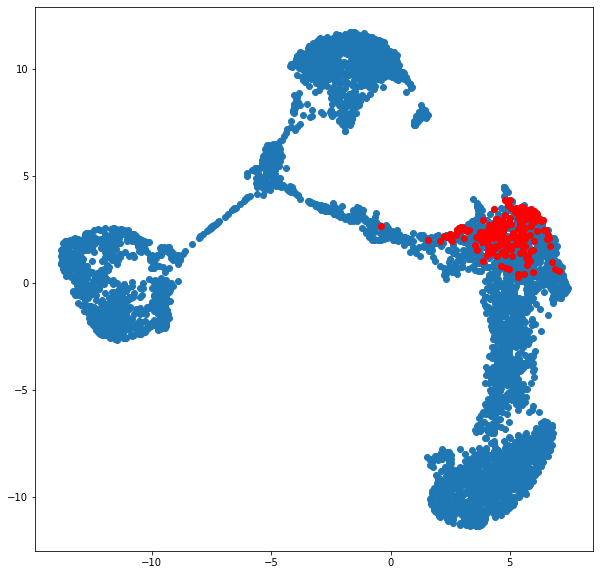

In [160]:
k = 200
plot_marker(norm_mat, coords, luminal_progenitor, "m", k)
write_top_k_cells(norm_mat, luminal_progenitor, "m", k, base_dir + "cells-luminal.json")

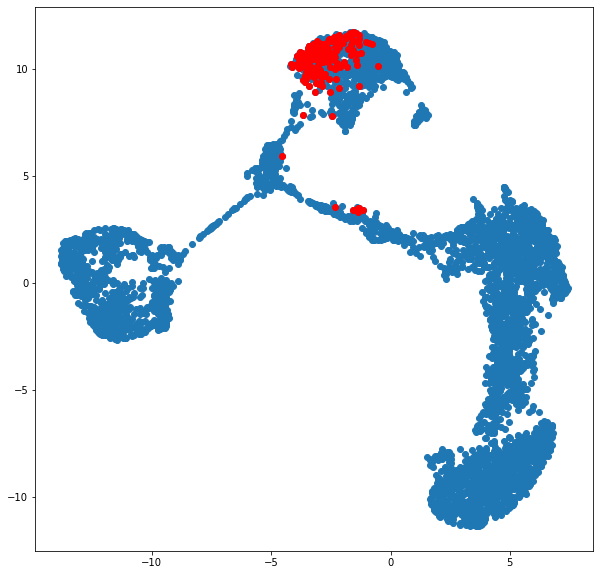

In [161]:
plot_marker(norm_mat, coords, myoepithelial, "m", k)
write_top_k_cells(norm_mat, myoepithelial, "m", k, base_dir + "cells-basal.json")

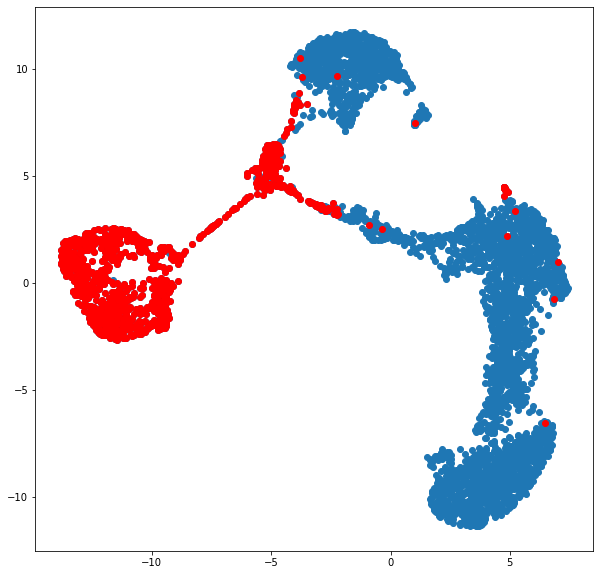

In [129]:
plot_marker(norm_mat, coords, [], "t", 10000)